<a href="https://www.kaggle.com/code/ziadhamadafathy/classification-rice-type-cnn-with-accuracy-99-4?scriptVersionId=108024786" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob as gb
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)
        #print(os.path.join(dirname, filename))

In [2]:
data = '../input/rice-image-dataset/Rice_Image_Dataset/'

In [3]:
for folder in  os.listdir(data): 
    files = gb.glob(pathname= str( data + folder + '/*.jpg'))
    print(f'For data , found {len(files)} in folder {folder}')

For data , found 15000 in folder Karacadag
For data , found 15000 in folder Basmati
For data , found 15000 in folder Jasmine
For data , found 0 in folder Rice_Citation_Request.txt
For data , found 15000 in folder Arborio
For data , found 15000 in folder Ipsala


In [4]:
code = {'Karacadag':0 ,'Basmati':1 ,'Jasmine':2,'Arborio':3, 'Ipsala':4}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [5]:
size = []
for folder in  os.listdir(data) : 
    files = gb.glob(pathname= str( data + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts

<bound method IndexOpsMixin.value_counts of 0        (250, 250, 3)
1        (250, 250, 3)
2        (250, 250, 3)
3        (250, 250, 3)
4        (250, 250, 3)
             ...      
74995    (250, 250, 3)
74996    (250, 250, 3)
74997    (250, 250, 3)
74998    (250, 250, 3)
74999    (250, 250, 3)
Length: 75000, dtype: object>

In [6]:
s = 100
X_Images = []
y_Types = []
for folder in  os.listdir(data) : 
    files = gb.glob(pathname= str( data + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_Images.append(list(image_array))
        y_Types.append(code[folder])

In [7]:
print(f'we have {len(X_Images)} items in X_Images')
print(f'we have {len(y_Types)} items in Y_Types')

we have 75000 items in X_Images
we have 75000 items in Y_Types


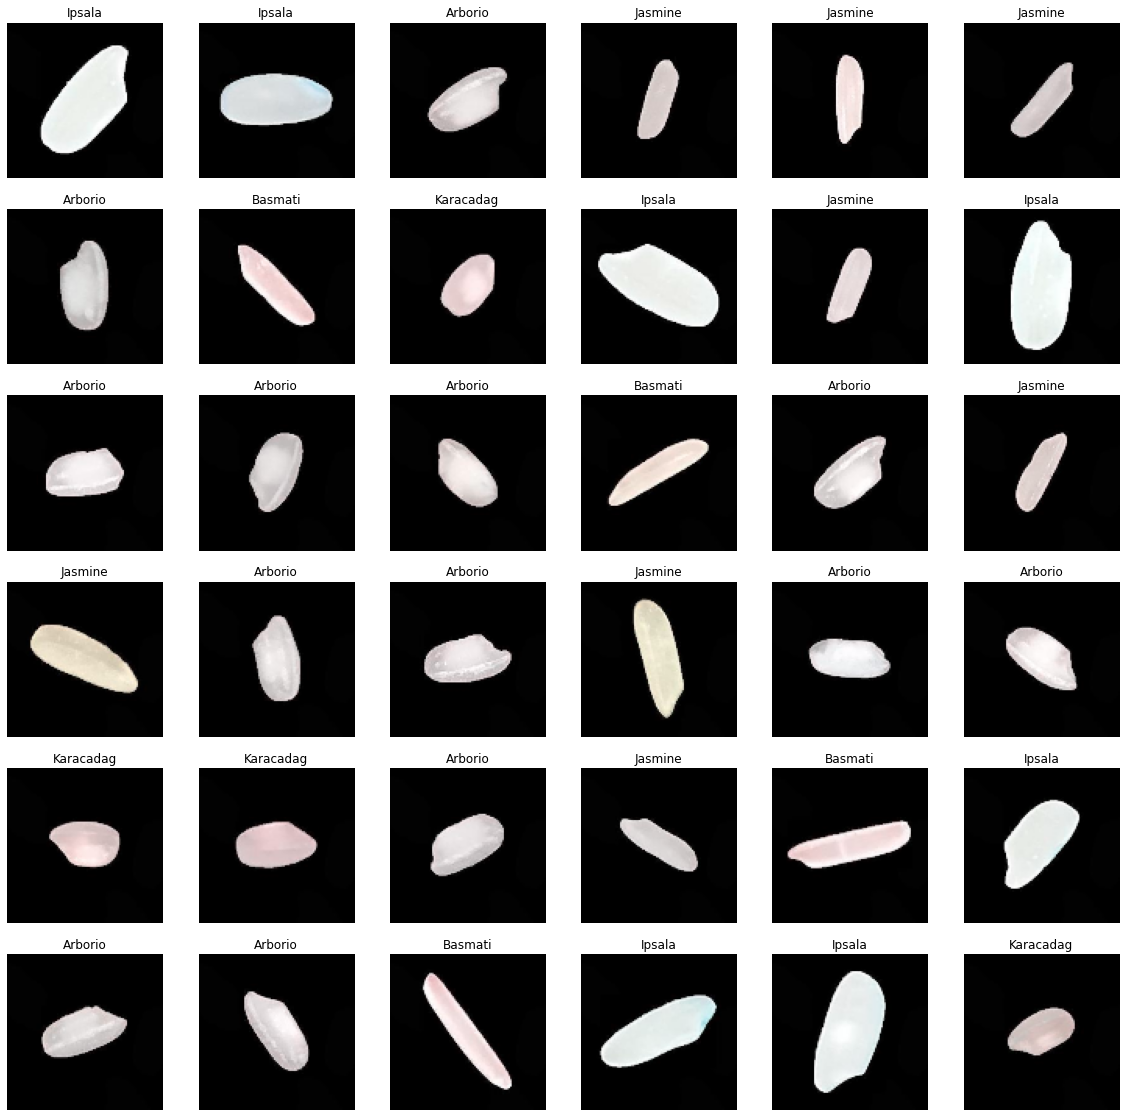

In [8]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_Images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_Images[i])   
    plt.axis('off')
    plt.title(getcode(y_Types[i]))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_Images, y_Types, train_size=0.9, shuffle=True)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [10]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(512,activation='relu') ,    
        keras.layers.Dense(512,activation='relu') ,    
        keras.layers.Dense(256,activation='relu') ,
        keras.layers.Dense(256,activation='relu') ,
        keras.layers.Dense(5,activation='softmax') ,    
        ])

2022-10-14 00:18:26.078619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-14 00:18:26.173915: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-14 00:18:26.174721: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-14 00:18:26.176447: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [11]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 256)       7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 256)       590080    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 256)       590080    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       295040    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None,

In [13]:
epochs = 10
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

2022-10-14 00:18:28.927761: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2025000000 exceeds 10% of free system memory.
2022-10-14 00:18:31.718656: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2025000000 exceeds 10% of free system memory.
2022-10-14 00:18:33.336111: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-10-14 00:18:34.839429: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1055/1055 [==============================] - 149s 133ms/step - loss: 0.1976 - accuracy: 0.9399
Epoch 2/10
1055/1055 [==============================] - 137s 130ms/step - loss: 0.1076 - accuracy: 0.9635
Epoch 3/10
1055/1055 [==============================] - 137s 130ms/step - loss: 0.0816 - accuracy: 0.9732
Epoch 4/10
1055/1055 [==============================] - 137s 130ms/step - loss: 0.0767 - accuracy: 0.9757
Epoch 5/10
1055/1055 [==============================] - 137s 130ms/step - loss: 0.0511 - accuracy: 0.9839
Epoch 6/10
1055/1055 [==============================] - 137s 130ms/step - loss: 0.0437 - accuracy: 0.9865
Epoch 7/10
1055/1055 [==============================] - 137s 130ms/step - loss: 0.0407 - accuracy: 0.9875
Epoch 8/10
1055/1055 [==============================] - 137s 130ms/step - loss: 0.0454 - accuracy: 0.9870
Epoch 9/10
1055/1055 [==============================] - 137s 130ms/step - loss: 0.0378 - accuracy: 0.9890
Epoch 10/10
1055/1055 [==============================] - 

In [14]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test,batch_size=64)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

118/118 [==============================] - 5s 45ms/step - loss: 0.0299 - accuracy: 0.9912
Test Loss is 0.029862551018595695
Test Accuracy is 0.9911999702453613


In [15]:
y_pred = KerasModel.predict(X_test)
print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (7500, 5)


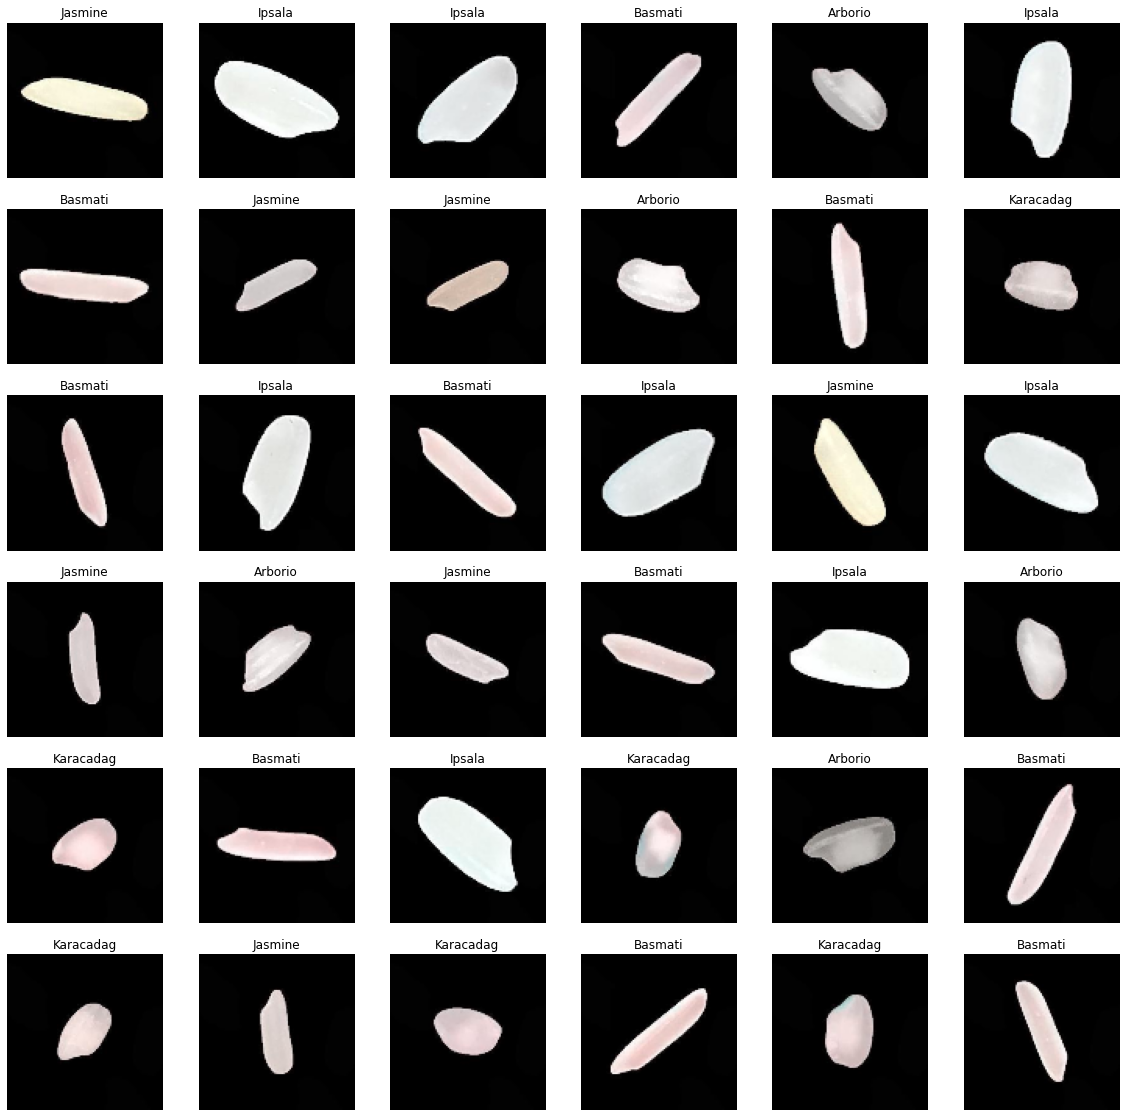

In [16]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_pred[i])))
